In [119]:
import numpy as np
from numpy import sqrt, log
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import math
from numpy import exp
from scipy import linalg
from scipy.sparse import diags

In [120]:
directory='/Users/julnow/Desktop/szkoła/KMS/2/'
params = directory + 'params.txt'


    Przesyłam zadanie drugie - jest to ex. 19 z przesłąnego materiału. Wcześniej należy przeczytać podp. 5.2.4.
Celem będzie rozwiazanie jednowymairowego równania Schrodingera zaleznego od czasu, korzystając z operatora ewolucji czasowej w postaci Cayleya (wz. 5.86) - było o tym trochę na ostatnim wykładzie przy okazji metody TDHF. Startujemy z funkcji (5.91) a nastepnie propagujemy taki impuls falowy uwzględniając próg potencjału z podpunktu 19b. Resztę doprecyzuję na zajęciach, ale procedurę budujaca macierz (lewa strona wz. 5.89) można sobie już przygotować. Do rozwiązania numerycznego układu równań (5.89) stosujemy oczywiscie funkcje biblioteczne.


In [121]:
# imaginary unit in numpy = 1j
pi = np.pi

# consts
x0 = -5
x1 = 25
x_steps = 200
x = np.linspace(x0, x1, x_steps)
dx = abs(x0-x1)/x_steps
v0 = 105
sigma = 0.5
k0 = 10
dk = 1
t0 = 0
t1 = 1
dt = 0.005

# psi0
psi = sqrt(dk) / pow(pi, 1/4) * exp(- (x**2 * dk**2 / 2)) * exp(1j* k0 * x)
# v0
def set_v(x):
    v = v0 * exp (- ( x-10)**2 / sigma**2)
    return v
# v = v(x)
# 5.90
def set_A(v):
    b =  1 + 1j * dt  / 2 * ( 2/dx**2 + v )
    a = c = np.full( (len(b) - 1), - 1j*dt/2/ dx**2)
    #diagonal matrix using scipy function
    offset = [-1,0,1]
    A = diags([a, b, c] ,offset).toarray()
    return A
def set_r(psi, v):
    # 5.89
    r = psi
    for i, ri in enumerate(r):
        if i != 0 and i != len(r)-1:
            r[i] += 1j *dt / 2 * ( (r[i+1] - 2*ri + r[i-1])/dx**2 - v[i]*ri )
        elif i==0:
            r[i] += 1j *dt / 2 * ( (r[i+1] - 2*ri + 0)/dx**2 - v[i]*ri )
        elif len(r)-1:
            r[i] += 1j *dt / 2 * ( (0 - 2*ri + 0)/dx**2 - v[i]*ri )
    return r
# r = r(psi, v)

In [146]:
#calculate next step from 5.89
def simulate(psi):
    v = set_v(x)
    A = set_A(v)
    r = set_r(psi, v)
    psi = linalg.solve(A, r)
    return psi
def print_psi(psi):
    return abs(psi)

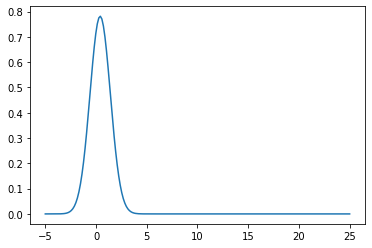

In [182]:
def create_video(psi):
    
    fig, ax = plt.subplots()
    line, = ax.plot(x, print_psi(psi))

    def animate(i):
        global psi
        psi = simulate(psi)
        line.set_ydata(print_psi(psi))  # update the data.
        return line,
    
    def init():
        global psi
        line.set_ydata(print_psi(psi))
    return line,

    anim = animation.FuncAnimation(
    fig, animate, frames=1000, init_func=init, blit = True, interval=20)

    plt.show()

    return anim

anim = create_video(psi)

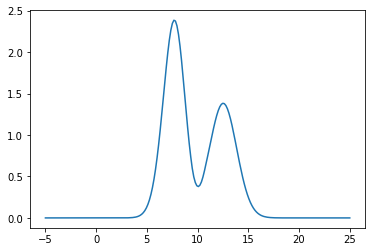

In [388]:
fig, ax = plt.subplots()
psi = simulate(psi)
line, = ax.plot(x, print_psi(psi))
line.set_ydata(print_psi(psi))  # update the data.